In [54]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [55]:
import os
import glob
def textfile():
    files = glob.glob("./files/*榮剛.txt")
    return files
textfile=textfile()
textfile

['./files\\20170216榮剛.txt',
 './files\\20171207榮剛.txt',
 './files\\20171215榮剛.txt',
 './files\\20171225榮剛.txt',
 './files\\20171227榮剛.txt',
 './files\\20171228榮剛.txt',
 './files\\20171230榮剛.txt',
 './files\\20180117榮剛.txt',
 './files\\20180122榮剛.txt',
 './files\\20180123榮剛.txt']

### 自定義jieba字典，存檔到dict.txt

In [56]:
dictlist = ['股東臨時會','智冠','大同股份有限公司','公允價值','財務報表','林蔚山','信用評等','王炯棻']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

### 定義停止詞與要剔除的特殊符號

In [57]:
stop = open('stopwords.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
stopwords

['我',
 '對',
 '年',
 '月',
 '的',
 '1',
 '2',
 '(',
 ')',
 '/',
 '於',
 '大同',
 '公司',
 '4',
 '106',
 '臺',
 '本',
 '人',
 '為',
 '之',
 '北',
 '5',
 '有',
 '元',
 '一事',
 'TCRI',
 'ai',
 '台灣',
 '之爭',
 '表示',
 '億元',
 '今年',
 '指出',
 '特殊',
 '記者',
 '台紙',
 '智冠',
 '榮剛',
 '台苯',
 '遊戲',
 '目前',
 '去年']

In [58]:

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [59]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['個 股 經營權 外資 態度 是 關鍵 財訊 新聞 財訊 快報 李娟萍 報導 鋼鐵 金智富 投資 董事 長 王炯棻 今天 證實 鋼鐵自 起開 始自 市場 收購 股權 他 也 與 該 董事 長 陳 興時 見 過面 鋼鐵 希望 能 在 董監事 改選時 獲得 董事 席次 王炯棻 說 鋼鐵 收購 鋼電爐 廠榮剛 股權 理由 二 技術 及 客戶 含金量 高 脫鋼 入材 轉型 策略 獲 肯定 且 可為 集團 鋼鐵廠 上游 材料 供應商 進行 產業 上下游 整合 長 榮集團 退出 後 一直 由 專業 經理人 經營 派 持股 約 外資 持有 另有 壽險 持股 鋼鐵 持股 據稱 已 超過 派 但 派 與 鋼鐵 尚未 取得 共識 以致 經營權 預期 外資 態度 將攸關 董事 會 改選 結果 鋼鐵 集團 旗下 已有 慶 欣欣 春雨 久陽 沛波 易 昇 官田 鋼 等 六家 鋼廠 另鏈 條大廠 桂盟 友好 企業 投資團隊 實際 參與 經營 如 春雨 久陽 未 參 與 經營 如沛波 官田 鋼等',
 '經營 權大戰 再起 董座 恐遭 解任 年月日 工商 時報 林憲祥 高雄 報導 鋼鐵 集團 與 之間 人事 紛爭 正式 浮出 檯 面 不銹 鋼大廠 將於月 日 召開 股東臨時會 將討論 解任 董事 長 陳 興時 陳 驥 智 總經理 張世豐 徐小波 等 名 董事 人事 案 對此 最大 股東 鋼鐵 集團 董事 長 王 烔 棻 昨 日 晚間 以 持股 加上 股東友 軍 支持 很 有把握 通過 這項 解任 案 榮剛現 有名 董事 除 上述 人外 尚 包括 王 烔 棻 林文淵 簡 金城 陳 義松 陳 發熹 王 烔 棻 日 股東臨時會 是 由 獨立 董事 簡 金城 召集 將有 適當 理由 通過 陳 輿時 等 解任 案 王 烔 棻 說 簡 金城 自 日 擔任 材料 科技 獨立 董事 以來 積極 行使 獨立 董事 職責 上半年 度 發生 下列 嚴重 損及 權益 及 股東 利益 情事 已積極 進行 查核 台鋼 提出 解任 理由 包括 伐 間 通過 如 終止 陳 興時 擔任 董事 長 經理人 職務時 竟允 其 領取 高達個 鉅 額 退職 福利 且 月間 通過 重要 子公司 金耘 鋼鐵 持股 出售 給陳興時 及陳驥智 擔任 董事 長 禾揚 投資 交易 價格 每股 不但 低 金耘 鋼鐵 每股 淨值 且 金耘 鋼鐵 在 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [60]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  1112


In [61]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (10, 1112)


<10x1112 sparse matrix of type '<class 'numpy.float64'>'
	with 1562 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [62]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
一直 0.08291576598305088 0 12
上下游 0.09753747642505899 0 22
上游 0.09753747642505899 0 27
久陽 0.16583153196610176 0 63
今天 0.09753747642505899 0 92
以致 0.08291576598305088 0 107
企業 0.09753747642505899 0 111
供應商 0.08291576598305088 0 120
入材 0.09753747642505899 0 148
六家 0.09753747642505899 0 165
共識 0.09753747642505899 0 167
參與 0.08291576598305088 0 239
友好 0.09753747642505899 0 244
取得 0.07254149732557466 0 248
另有 0.09753747642505899 0 252
另鏈 0.09753747642505899 0 253
可為 0.09753747642505899 0 263
含金量 0.09753747642505899 0 285
報導 0.052360870567957 0 338
壽險 0.09753747642505899 0 343
外資 0.24874729794915262 0 346
如沛波 0.09753747642505899 0 367
始自 0.09753747642505899 0 368
官田 0.19507495285011797 0 377
客戶 0.08291576598305088 0 378
實際 0.08291576598305088 0 383
將攸關 0.09753747642505899 0 387
專業 0.08291576598305088 0 400
尚未 0.07254149732557466 0 410
已有 0.09753747642505899 0 419
希望 0.07254149732557466 0 425
席次 0.06449458939423335 0 431
廠榮剛 0.09753747642505899 0 439
快報 0.09753747642505899 0 

觀察 0.07635027445943565 2 910
解除 0.05678395047222171 2 913
近半年 0.07635027445943565 2 972
退居 0.07635027445943565 2 978
這是 0.06490470864995464 2 989
進入 0.05678395047222171 2 1001
進展 0.07635027445943565 2 1003
還不 0.07635027445943565 2 1019
還鬧 0.07635027445943565 2 1026
鋼界 0.1527005489188713 2 1051
鋼鐵 0.07443525297001556 2 1053
關切 0.05678395047222171 2 1061
隨即 0.07635027445943565 2 1072
雄厚 0.07635027445943565 2 1074
集團 0.07443525297001556 2 1075
雙包 0.06490470864995464 2 1077
雙方 0.11356790094444343 2 1078
雙方劍拔 0.07635027445943565 2 1079
預定明 0.07635027445943565 2 1091
高雄 0.05048500106706903 2 1106
鴨子 0.05678395047222171 2 1107
龐大 0.07635027445943565 2 1111
----Document 3----
主場 0.05890827000669711 3 59
主角 0.05890827000669711 3 62
事實 0.05007741136397479 3 69
二路 0.05890827000669711 3 74
互控 0.05890827000669711 3 75
以上 0.05890827000669711 3 100
以主場 0.05890827000669711 3 101
以及 0.20030964545589916 3 103
來源 0.23563308002678843 3 117
來襲 0.05890827000669711 3 118
元大證券 0.05890827000669711 3 142
內部 0.0

出售 0.08798227628181393 6 179
勢力 0.06899829079079801 6 217
原本 0.058654850854542626 6 235
可能 0.05131606342835386 6 264
台鋼 0.07408046026868588 6 268
合作 0.0769740951425308 6 276
因台 0.06899829079079801 6 312
執點 0.10349743618619701 6 335
報導 0.07408046026868588 6 338
多少 0.17249572697699503 6 351
委任 0.13799658158159603 6 369
子公司 0.0769740951425308 6 373
對象 0.06899829079079801 6 405
就是 0.05131606342835386 6 411
張世豐 0.055560345201514406 6 449
怎麼 0.06899829079079801 6 464
意思 0.06899829079079801 6 475
投資 0.05131606342835386 6 492
持股 0.05045075409886458 6 500
擱置 0.06899829079079801 6 532
日舉行 0.06899829079079801 6 564
會中 0.10349743618619701 6 588
未來 0.05131606342835386 6 605
每股 0.08798227628181393 6 650
比重 0.058654850854542626 6 652
獨董 0.17249572697699503 6 712
獲利 0.058654850854542626 6 713
發熹 0.14663712713635657 6 740
發生 0.058654850854542626 6 742
知道 0.14663712713635657 6 762
福利 0.058654850854542626 6 770
私募 0.06899829079079801 6 773
簡金成 0.14663712713635657 6 799
經營權 0.06125836711168622 6 820
經理 0.

接任 0.11997729290692188 9 509
推選榮剛 0.05998864645346094 9 515
提前 0.05998864645346094 9 518
改善 0.05998864645346094 9 537
改選 0.058484008154607976 9 539
政祥 0.05998864645346094 9 544
新任 0.17996593936038283 9 551
新營 0.05998864645346094 9 552
明確 0.05998864645346094 9 565
時應 0.05998864645346094 9 572
時興 0.05998864645346094 9 574
時間 0.10199166009378603 9 576
曾埜觀 0.05998864645346094 9 583
最後股 0.05998864645346094 9 585
會將 0.05998864645346094 9 591
李宜 0.050995830046893016 9 611
李宜儒 0.05998864645346094 9 612
李郁 0.05998864645346094 9 613
林嘉洪 0.050995830046893016 9 616
根據 0.08923065053076493 9 622
案均 0.05998864645346094 9 624
此外 0.05998864645346094 9 645
永欣 0.05998864645346094 9 654
求償 0.05998864645346094 9 655
決議 0.05998864645346094 9 662
派會議 0.05998864645346094 9 679
流會 0.05998864645346094 9 681
湯泰民 0.05998864645346094 9 688
營運績 0.05998864645346094 9 702
獲通過 0.05998864645346094 9 715
王炯棻 0.15977815471347978 9 717
直接 0.05998864645346094 9 751
相關個 0.05998864645346094 9 755
研發 0.05998864645346094 9 764

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [63]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./files\20170216榮剛.txt,./files\20171207榮剛.txt,./files\20171215榮剛.txt,./files\20171225榮剛.txt,./files\20171227榮剛.txt,./files\20171228榮剛.txt,./files\20171230榮剛.txt,./files\20180117榮剛.txt,./files\20180122榮剛.txt,./files\20180123榮剛.txt
0,一個,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060544,0.000000
1,一個爭,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034499,0.000000,0.000000,0.000000
2,一千,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034499,0.000000,0.000000,0.000000
3,一半,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034499,0.000000,0.000000,0.000000
4,一員,0.000000,0.000000,0.000000,0.000000,0.000000,0.069202,0.000000,0.000000,0.000000,0.000000
5,一回,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034499,0.000000,0.000000,0.000000
6,一場,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103497,0.000000,0.000000,0.000000
7,一搏,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060544,0.000000
8,一是,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059989
9,一月,0.000000,0.000000,0.000000,0.000000,0.000000,0.069202,0.000000,0.000000,0.000000,0.000000


In [64]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./files\20170216榮剛.txt,./files\20171207榮剛.txt,./files\20171215榮剛.txt,./files\20171225榮剛.txt,./files\20171227榮剛.txt,./files\20171228榮剛.txt,./files\20171230榮剛.txt,./files\20180117榮剛.txt,./files\20180122榮剛.txt,./files\20180123榮剛.txt
0,一個,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060544,0.000000
1,一個爭,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034499,0.000000,0.000000,0.000000
2,一千,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034499,0.000000,0.000000,0.000000
3,一半,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034499,0.000000,0.000000,0.000000
4,一員,0.000000,0.000000,0.000000,0.000000,0.000000,0.069202,0.000000,0.000000,0.000000,0.000000
5,一回,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034499,0.000000,0.000000,0.000000
6,一場,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103497,0.000000,0.000000,0.000000
7,一搏,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060544,0.000000
8,一是,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059989
9,一月,0.000000,0.000000,0.000000,0.000000,0.000000,0.069202,0.000000,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [65]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [66]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07635027],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06054428, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [67]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一個,0,0,0,0,0,0,0,0,1,0
1,一個爭,0,0,0,0,0,0,1,0,0,0
2,一千,0,0,0,0,0,0,1,0,0,0
3,一半,0,0,0,0,0,0,1,0,0,0
4,一員,0,0,0,0,0,1,0,0,0,0
5,一回,0,0,0,0,0,0,1,0,0,0
6,一場,0,0,0,0,0,0,3,0,0,0
7,一搏,0,0,0,0,0,0,0,0,1,0
8,一是,0,0,0,0,0,0,0,0,0,1
9,一月,0,0,0,0,0,1,0,0,0,0


In [68]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一個,0,0,0,0,0,0,0,0,1,0
1,一個爭,0,0,0,0,0,0,1,0,0,0
2,一千,0,0,0,0,0,0,1,0,0,0
3,一半,0,0,0,0,0,0,1,0,0,0
4,一員,0,0,0,0,0,1,0,0,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [69]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一個,0,0,0,0,0,0,0,0,1,0
1,一個爭,0,0,0,0,0,0,1,0,0,0
2,一千,0,0,0,0,0,0,1,0,0,0
3,一半,0,0,0,0,0,0,1,0,0,0
4,一員,0,0,0,0,0,1,0,0,0,0
5,一回,0,0,0,0,0,0,1,0,0,0
6,一場,0,0,0,0,0,0,3,0,0,0
7,一搏,0,0,0,0,0,0,0,0,1,0
8,一是,0,0,0,0,0,0,0,0,0,1
9,一月,0,0,0,0,0,1,0,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [70]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [71]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一個': 1,
 '一個爭': 1,
 '一千': 1,
 '一半': 1,
 '一員': 1,
 '一回': 1,
 '一場': 3,
 '一搏': 1,
 '一是': 1,
 '一月': 1,
 '一期': 1,
 '一次': 1,
 '一直': 2,
 '一秒': 1,
 '一職': 1,
 '一致': 1,
 '一萬': 1,
 '一起': 1,
 '三千': 1,
 '三月': 1,
 '三次': 1,
 '三胞': 1,
 '上下游': 1,
 '上則': 1,
 '上午': 2,
 '上半年': 3,
 '上市': 1,
 '上游': 1,
 '上演': 1,
 '上火': 1,
 '上述': 1,
 '下列': 1,
 '下午': 1,
 '下周': 1,
 '下降': 1,
 '不但': 1,
 '不到': 2,
 '不及': 1,
 '不合': 1,
 '不同': 3,
 '不好意思': 1,
 '不安': 1,
 '不斷': 2,
 '不是': 1,
 '不法': 1,
 '不解': 1,
 '不論': 1,
 '不過': 1,
 '不銹': 1,
 '且員': 1,
 '世界': 1,
 '並不': 1,
 '並且': 1,
 '並先': 1,
 '並對': 1,
 '並未': 3,
 '並由': 1,
 '中心': 1,
 '中秀出': 1,
 '主場': 1,
 '主管': 1,
 '主要': 5,
 '主角': 1,
 '久陽': 3,
 '之前': 2,
 '之福': 1,
 '之間': 1,
 '乙事': 1,
 '了解': 5,
 '事實': 2,
 '事情': 1,
 '事項': 1,
 '二度': 1,
 '二是': 1,
 '二路': 1,
 '互控': 1,
 '五個': 1,
 '五千': 1,
 '五席': 1,
 '五月': 1,
 '交易': 4,
 '亨網': 4,
 '人並': 1,
 '人事': 2,
 '人則': 1,
 '人合約': 3,
 '人士': 3,
 '人外': 1,
 '人尚': 1,
 '人經營': 1,
 '人馬': 1,
 '什麼': 3,
 '今天': 1,
 '今日': 1,
 '今辭': 1,
 '仍將': 2,
 '仍持續': 1,
 '他們': 6,
 '代表': 8,
 

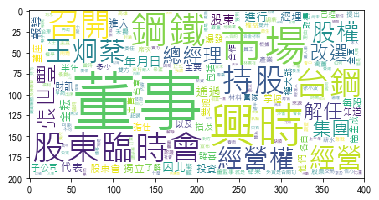

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [73]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('董事', 96),
 ('興時', 42),
 ('市場', 34),
 ('鋼鐵', 26),
 ('股東臨時會', 22),
 ('台鋼', 21),
 ('召開', 19),
 ('持股', 19),
 ('王炯棻', 18),
 ('經營', 18),
 ('經營權', 18),
 ('股權', 16),
 ('張世豐', 13),
 ('總經理', 12),
 ('解任', 12),
 ('改選', 11),
 ('集團', 11),
 ('年月日', 10),
 ('股東', 10),
 ('通過', 10),
 ('因此', 9),
 ('報導', 9),
 ('進行', 9),
 ('金耘', 9),
 ('代表', 8),
 ('獨立', 8),
 ('經理', 8),
 ('投資', 7),
 ('每股', 7),
 ('股東會', 7)]

In [74]:
data = []
for t in ten[:15]:
    data.append(t[1])
label = []
for t in ten[:15]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xedbf898>,
 <a list of 15 Text xticklabel objects>)

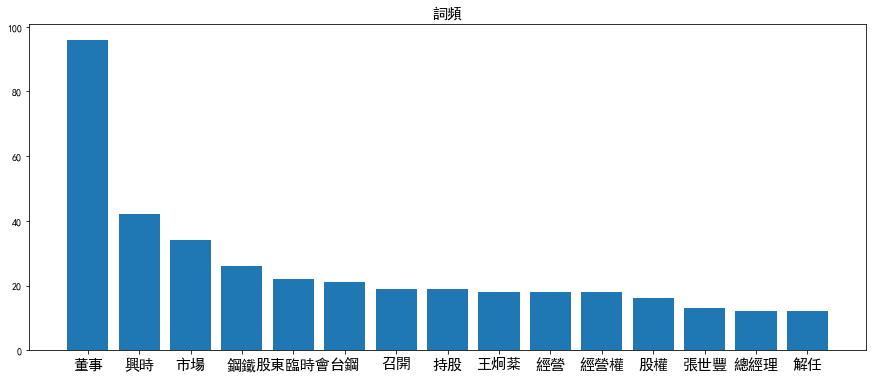

In [75]:
plt.figure(figsize=(15,6))
plt.bar(range(0,15),data)
plt.title("詞頻",fontsize=15)
plt.xticks(range(0,15),label,fontsize=15)

In [76]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.08516627, -0.22529018],
       [ 0.52556837, -0.00491509],
       [-0.17576812, -0.26431581],
       [-0.46286443,  0.07358655],
       [-0.41531194, -0.1945677 ],
       [-0.2161287 , -0.16156236],
       [ 0.40906784, -0.10754165],
       [-0.11212424,  0.88763279],
       [ 0.24741628,  0.00912161],
       [ 0.28531123, -0.01214816]])

No handles with labels found to put in legend.


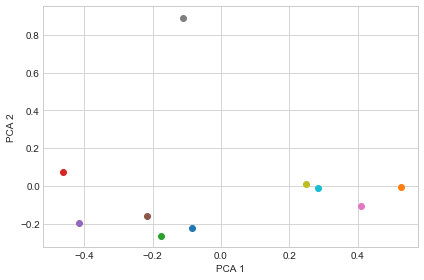

In [77]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [78]:
from sklearn.cluster import KMeans

In [79]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

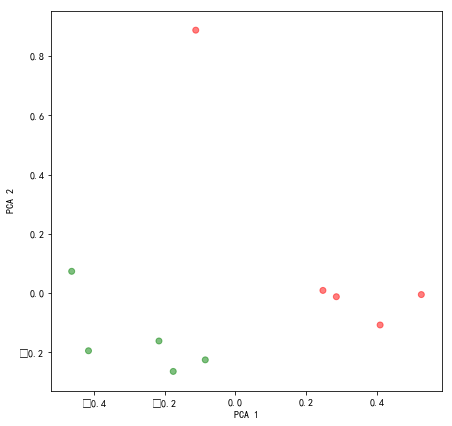

In [80]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()